In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import torch
import numpy as np
import matplotlib.pyplot as plt
import os
os.environ['HOME_DIR'] = 'drive/MyDrive/hidden-networks'

!pip install optuna
import optuna

import sys
sys.path.append(os.path.join('/content', os.environ['HOME_DIR']))

import pickle

In [41]:
train_args, args, train_res, test_res = torch.load(os.path.join(os.environ['HOME_DIR'], "results", "conv2-sparsity.pt"))
train_args, args, train_res2, test_res2 = torch.load(os.path.join(os.environ['HOME_DIR'], "results", "conv2-sparsity2.pt"))

[train_res2[k].append(x[0]) for (k, x) in train_res.items()]
[test_res2[k].append(x[0]) for (k, x) in test_res.items()]
train_res = train_res2
test_res = test_res2

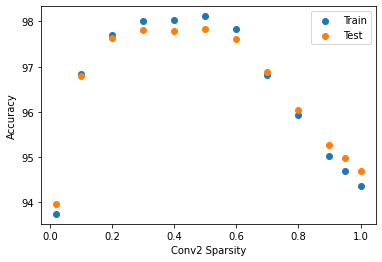

In [42]:
res = np.array([(k, np.array(x)[:, 0].mean()) for k, x in train_res.items()])
plt.scatter(res[:, 0], res[:, 1], label="Train")
res = np.array([(k, np.array(x)[:, 0].mean()) for k, x in test_res.items()])
plt.scatter(res[:, 0], res[:, 1], label="Test")
plt.ylabel("Accuracy")
plt.xlabel("Conv2 Sparsity")
plt.legend()
plt.show()

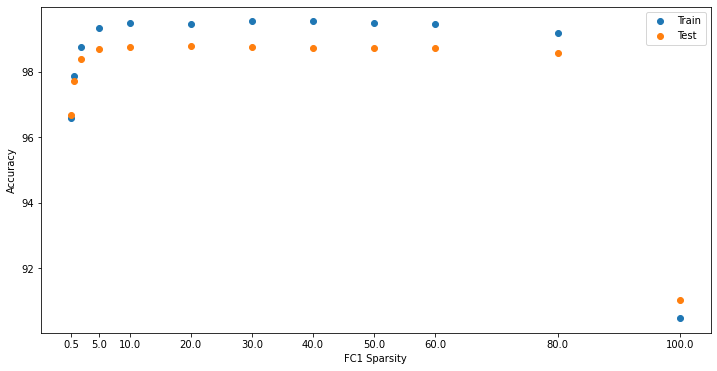

In [43]:
plt.figure(figsize=(12, 6))
train_args, args, train_res, test_res = torch.load(os.path.join(os.environ['HOME_DIR'], "results", "fc1-sparsity.pt"))
res = np.array([(100 * k, np.array(x)[:, 0].mean()) for k, x in train_res.items()])
plt.scatter(res[:, 0], res[:, 1], label="Train")
res = np.array([(100 * k, np.array(x)[:, 0].mean()) for k, x in test_res.items()])
plt.scatter(res[:, 0], res[:, 1], label="Test")
plt.ylabel("Accuracy")
plt.xlabel("FC1 Sparsity")
plt.xticks([100 * x for x in train_res.keys() if not (x > 0.005 and x < 0.05)])
plt.legend()
plt.show()

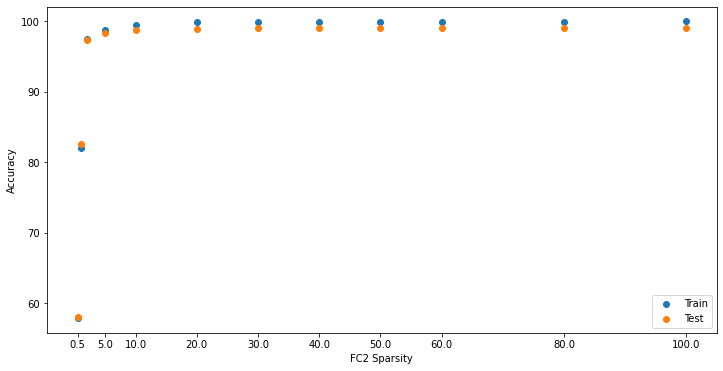

In [44]:
plt.figure(figsize=(12, 6))
train_args, args, train_res, test_res = torch.load(os.path.join(os.environ['HOME_DIR'], "results", "fc2-sparsity.pt"))
res = np.array([(100 * k, np.array(x)[:, 0].mean()) for k, x in train_res.items()])
plt.scatter(res[:, 0], res[:, 1], label="Train")
res = np.array([(100 * k, np.array(x)[:, 0].mean()) for k, x in test_res.items()])
plt.scatter(res[:, 0], res[:, 1], label="Test")
plt.ylabel("Accuracy")
plt.xlabel("FC2 Sparsity")
plt.xticks([100 * x for x in train_res.keys() if not (x > 0.005 and x < 0.05)])
plt.legend()
plt.show()

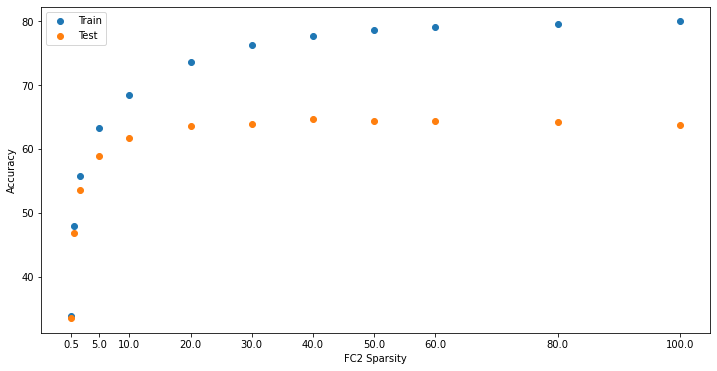

In [45]:
plt.figure(figsize=(12, 6))
train_args, args, train_res, test_res = torch.load(os.path.join(os.environ['HOME_DIR'], "results", "CIFAR10-fc2-sparsity.pt"))
res = np.array([(100 * k, np.array(x)[:, 0].mean()) for k, x in train_res.items() if len(x) > 0])
plt.scatter(res[:, 0], res[:, 1], label="Train")
res = np.array([(100 * k, np.array(x)[:, 0].mean()) for k, x in test_res.items() if len(x) > 0])
plt.scatter(res[:, 0], res[:, 1], label="Test")
plt.ylabel("Accuracy")
plt.xlabel("FC2 Sparsity")
plt.xticks([100 * x for x in train_res.keys() if not (x > 0.005 and x < 0.05)])
plt.legend()
plt.show()

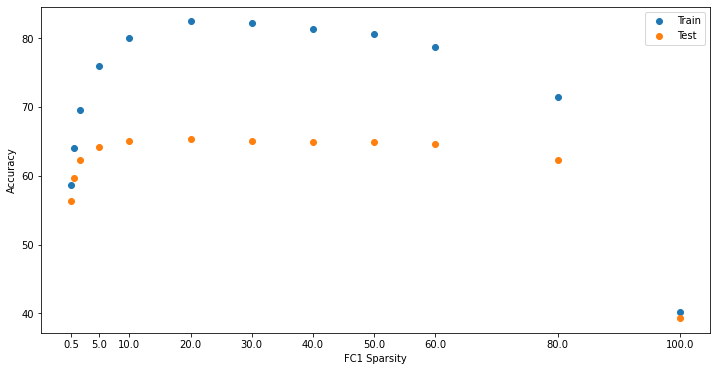

In [46]:
plt.figure(figsize=(12, 6))
train_args, args, train_res, test_res = torch.load(os.path.join(os.environ['HOME_DIR'], "results", "CIFAR10-fc1_sparsity.pt"))
res = np.array([(100 * k, np.array(x)[:, 0].mean()) for k, x in train_res.items() if len(x) > 0])
plt.scatter(res[:, 0], res[:, 1], label="Train")
res = np.array([(100 * k, np.array(x)[:, 0].mean()) for k, x in test_res.items() if len(x) > 0])
plt.scatter(res[:, 0], res[:, 1], label="Test")
plt.ylabel("Accuracy")
plt.xlabel("FC1 Sparsity")
plt.xticks([100 * x for x in train_res.keys() if not (x > 0.005 and x < 0.05)])
plt.legend()
plt.show()

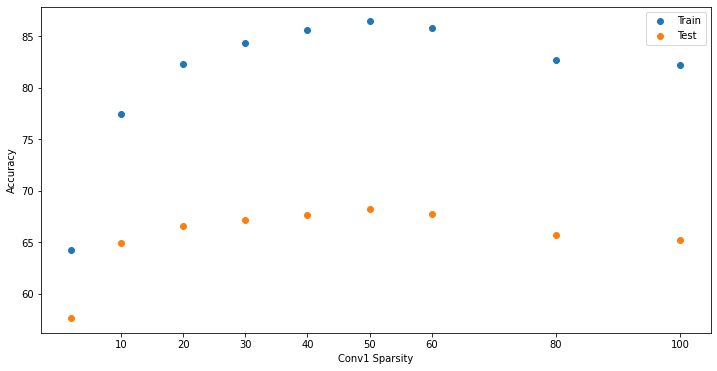

In [47]:
plt.figure(figsize=(12, 6))
train_args, args, train_res, test_res = torch.load(os.path.join(os.environ['HOME_DIR'], "results", "CIFAR10-conv1_sparsity.pt"))
res = np.array([(100 * k, np.array(x)[:, 0].mean()) for k, x in train_res.items() if len(x) > 0])
plt.scatter(res[:, 0], res[:, 1], label="Train")
res = np.array([(100 * k, np.array(x)[:, 0].mean()) for k, x in test_res.items() if len(x) > 0])
plt.scatter(res[:, 0], res[:, 1], label="Test")
plt.ylabel("Accuracy")
plt.xlabel("Conv1 Sparsity")
plt.xticks([100 * x for x in train_res.keys() if not (x > 0.005 and x < 0.05)])
plt.legend()
plt.show()

In [48]:
def print_res(lst, name):
    res = np.array(lst).mean(axis=0)
    std_res = np.array(lst).std(axis=0)
    print(f"{name} Mean Accuracy: {res[0]} ± {std_res[0]}, Mean Loss: {res[1]} ± {std_res[1]}")

def compare(fname1, fname2):
    _, _, tr_lst1, t_lst1 = torch.load(os.path.join(os.environ['HOME_DIR'], "results", fname1))
    _, _, tr_lst2, t_lst2 = torch.load(os.path.join(os.environ['HOME_DIR'], "results", fname2))
    print("Train Accuracy differences: ", np.array(tr_lst1)[:, 0] - np.array(tr_lst2)[:, 0])
    print("Test Accuracy differences: ", np.array(t_lst1)[:, 0] - np.array(t_lst2)[:, 0])

In [49]:
train_args, args, train_res, test_res = torch.load(os.path.join(os.environ['HOME_DIR'], "results", "freeze_CIFAR10.pt"))
print_res(train_res, name="Train")
print_res(test_res, name="Test")

Train Mean Accuracy: 73.10279999999999 ± 0.6109004501553417, Mean Loss: 0.012630218081176281 ± 0.0002747633437366164
Test Mean Accuracy: 63.68000000000001 ± 0.2109976303184457, Mean Loss: 0.0010530404280871153 ± 7.688662794731001e-06


In [50]:
train_args, args, train_res, test_res = torch.load(os.path.join(os.environ['HOME_DIR'], "results", "nonfreeze_CIFAR10.pt"))
print_res(train_res, name="Train")
print_res(test_res, name="Test")

Train Mean Accuracy: 84.4644 ± 0.44525839688881674, Mean Loss: 0.008296491019427777 ± 0.00022730333866391233
Test Mean Accuracy: 67.962 ± 0.41469989148781017, Mean Loss: 0.0009454409941099584 ± 8.843258283907947e-06


In [51]:
train_args, args, train_res, test_res = torch.load(os.path.join(os.environ['HOME_DIR'], "results", "freeze2_CIFAR10.pt"))
print_res(train_res, name="Train")
print_res(test_res, name="Test")

Train Mean Accuracy: 83.80080000000001 ± 0.8874859773540099, Mean Loss: 0.008775744587182999 ± 0.00027449574821907484
Test Mean Accuracy: 68.35799999999999 ± 0.35639304145844425, Mean Loss: 0.0009301184443756938 ± 1.1913283213657464e-05


In [52]:
train_args, args, train_res, test_res = torch.load(os.path.join(os.environ['HOME_DIR'], "results", "freeze3_CIFAR10.pt"))
print_res(train_res, name="Train")
print_res(test_res, name="Test")

Train Mean Accuracy: 85.468 ± 0.49943808425068936, Mean Loss: 0.008301988616585732 ± 0.00018671565882112955
Test Mean Accuracy: 69.148 ± 0.14190137420053353, Mean Loss: 0.0009083003504201769 ± 6.682690558028199e-06


In [53]:
train_args, args, train_res, test_res = torch.load(os.path.join(os.environ['HOME_DIR'], "results", "nonfreeze-20epoch_CIFAR10.pt"))
print_res(train_res, name="Train")
print_res(test_res, name="Test")

Train Mean Accuracy: 84.22999999999999 ± 0.8424079771702082, Mean Loss: 0.008348643779754639 ± 0.0002997399882859701
Test Mean Accuracy: 67.63999999999999 ± 0.11949895397031726, Mean Loss: 0.0009513222728855907 ± 6.714029635504957e-06


In [54]:
compare("freeze3_CIFAR10.pt", "nonfreeze-20epoch_CIFAR10.pt")

Train Accuracy differences:  [1.412 2.206 1.276 1.03  0.266]
Test Accuracy differences:  [1.39 1.6  1.44 1.49 1.62]


In [55]:
train_args, args, train_res, test_res = torch.load(os.path.join(os.environ['HOME_DIR'], "results", "freeze-30epoch_CIFAR10.pt"))
print_res(train_res, name="Train")
print_res(test_res, name="Test")

Train Mean Accuracy: 86.7176 ± 0.40114914931979906, Mean Loss: 0.007884962018579245 ± 0.00013700217302728786
Test Mean Accuracy: 69.348 ± 0.24383601046605208, Mean Loss: 0.0008991459384560585 ± 4.8455516144131325e-06


In [56]:
train_args, args, train_res, test_res = torch.load(os.path.join(os.environ['HOME_DIR'], "results", "nonfreeze-30epoch_CIFAR10.pt"))
print_res(train_res, name="Train")
print_res(test_res, name="Test")

Train Mean Accuracy: 86.37839999999998 ± 0.5068418293708555, Mean Loss: 0.007595268450677395 ± 0.00020248659962570842
Test Mean Accuracy: 68.10799999999999 ± 0.17837040113202426, Mean Loss: 0.0009368868893943727 ± 7.154126352682335e-06


In [57]:
compare("freeze3_CIFAR10.pt", "nonfreeze-30epoch_CIFAR10.pt")

Train Accuracy differences:  [-0.24  -1.508 -1.432 -0.616 -0.756]
Test Accuracy differences:  [1.19 1.31 1.19 0.58 0.93]


In [58]:
train_args, args, train_res, test_res = torch.load(os.path.join(os.environ['HOME_DIR'], "results", "freeze-40epoch_CIFAR10.pt"))
print_res(train_res, name="Train")
print_res(test_res, name="Test")

Train Mean Accuracy: 87.46959999999999 ± 0.5703870966282442, Mean Loss: 0.007698319293558598 ± 0.0001978761686382501
Test Mean Accuracy: 69.43599999999999 ± 0.19022092419079165, Mean Loss: 0.0008945662411861122 ± 3.854013547418965e-06


In [59]:
train_args, args, train_res, test_res = torch.load(os.path.join(os.environ['HOME_DIR'], "results", "nonfreeze-40epoch_CIFAR10.pt"))
print_res(train_res, name="Train")
print_res(test_res, name="Test")

Train Mean Accuracy: 87.4976 ± 0.4467149426647828, Mean Loss: 0.007240881398320198 ± 0.00018675922551402138
Test Mean Accuracy: 68.336 ± 0.4774767010022595, Mean Loss: 0.0009332378394901752 ± 1.0991219228396682e-05


In [60]:
compare("freeze-40epoch_CIFAR10.pt", "nonfreeze-40epoch_CIFAR10.pt")

Train Accuracy differences:  [ 0.108 -0.764 -0.058  0.362  0.212]
Test Accuracy differences:  [0.75 0.73 2.18 1.11 0.73]


In [61]:
test_res

[(68.59, 0.0009347648592665792),
 (68.61, 0.0009204823290929198),
 (67.53, 0.00094691599952057),
 (68.08, 0.0009431688813492656),
 (68.87, 0.0009208571282215416)]

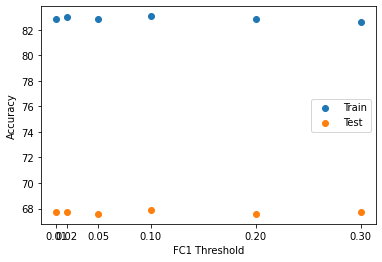

In [62]:
train_args, args, train_res, test_res = torch.load(os.path.join(os.environ['HOME_DIR'], "results", "CIFAR10-wd_normal_fc1_thresholds.pt"))
res = np.array([(k, np.array(x)[:, 0].mean()) for k, x in train_res.items() if len(x) > 0])
plt.scatter(res[:, 0], res[:, 1], label="Train")
res = np.array([(k, np.array(x)[:, 0].mean()) for k, x in test_res.items() if len(x) > 0])
plt.scatter(res[:, 0], res[:, 1], label="Test")
plt.ylabel("Accuracy")
plt.xlabel("FC1 Threshold")
plt.xticks([x for x in train_res.keys()])
plt.legend()
plt.show()

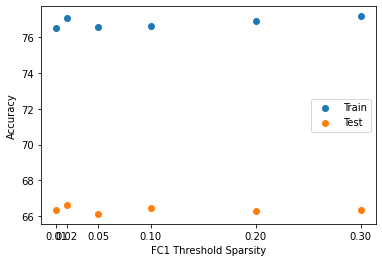

In [63]:

train_args, args, train_res, test_res = torch.load(os.path.join(os.environ['HOME_DIR'], "results", "CIFAR10-fc1_thresholds.pt"))
res = np.array([(k, np.array(x)[:, 0].mean()) for k, x in train_res.items() if len(x) > 0])
plt.scatter(res[:, 0], res[:, 1], label="Train")
res = np.array([(k, np.array(x)[:, 0].mean()) for k, x in test_res.items() if len(x) > 0])
plt.scatter(res[:, 0], res[:, 1], label="Test")
plt.ylabel("Accuracy")
plt.xlabel("FC1 Threshold Sparsity")
plt.xticks([x for x in train_res.keys()])
plt.legend()
plt.show()

In [8]:
with open(os.path.join(os.environ["HOME_DIR"], "results", "studies", "conv2_search_rs_500.pickle"), "rb") as f:
    study = pickle.load(f)

In [9]:
study.get_trials()

[FrozenTrial(number=0, values=[68.46], datetime_start=datetime.datetime(2022, 4, 21, 6, 36, 12, 682465), datetime_complete=datetime.datetime(2022, 4, 21, 7, 3, 20, 556866), params={'layer0_epochs': 40, 'layer1_epochs': 30, 'layer2_epochs': 92, 'layer3_epochs': 121, 'learning_rate': 0.19744378403555596, 'momentum': 0.3144108578172068, 'weight_decay': 0.0007413532887777817, 'sparsity_conv1': 0.40357939306453006, 'sparsity_conv2': 0.6523575139963601, 'sparsity_fc1': 0.6364947424521122, 'sparsity_fc2': 0.5893736291239299, 'sparsity_fc3': 0.25242414119241563}, distributions={'layer0_epochs': IntUniformDistribution(high=160, low=20, step=1), 'layer1_epochs': IntUniformDistribution(high=160, low=20, step=1), 'layer2_epochs': IntUniformDistribution(high=160, low=20, step=1), 'layer3_epochs': IntUniformDistribution(high=160, low=20, step=1), 'learning_rate': UniformDistribution(high=0.5, low=0.01), 'momentum': UniformDistribution(high=0.95, low=0.2), 'weight_decay': UniformDistribution(high=0.0

In [34]:
study.best_trials[0].params

{'layer0_epochs': 111,
 'layer1_epochs': 122,
 'layer2_epochs': 135,
 'layer3_epochs': 88,
 'learning_rate': 0.14537916681444576,
 'momentum': 0.5022009809850012,
 'sparsity_conv1': 0.5383408109467132,
 'sparsity_conv2': 0.33012651311494184,
 'sparsity_fc1': 0.482111200474775,
 'sparsity_fc2': 0.8841613079930085,
 'weight_decay': 0.00012277866498640503}

In [37]:
study.best_trials[0].user_attrs

{'test loss': 0.0008788540726527572,
 'test_acc': 70.94,
 'train_acc': 73.17,
 'train_loss': 0.012648540548980236}

In [39]:
[(s.value, list(s.user_attrs.items()), s.state) for s in study.get_trials()]

[(61.53,
  [('train_acc', 61.744),
   ('test_acc', 61.53),
   ('train_loss', 0.017441710457205772),
   ('test loss', 0.0011362181976437569)],
  TrialState.COMPLETE),
 (64.37,
  [('train_acc', 64.916),
   ('test_acc', 64.37),
   ('train_loss', 0.016080306842923164),
   ('test loss', 0.0010566323762759566)],
  TrialState.COMPLETE),
 (41.32, [], TrialState.PRUNED),
 (66.64,
  [('train_acc', 68.05),
   ('test_acc', 66.64),
   ('train_loss', 0.014584877528250217),
   ('test loss', 0.0009753374033607543)],
  TrialState.COMPLETE),
 (32.18, [], TrialState.PRUNED),
 (25.75, [], TrialState.PRUNED),
 (32.92, [], TrialState.PRUNED),
 (32.13, [], TrialState.PRUNED),
 (65.5,
  [('train_acc', 67.402),
   ('test_acc', 65.5),
   ('train_loss', 0.01506065484136343),
   ('test loss', 0.0010021044872701168)],
  TrialState.COMPLETE),
 (33.35, [], TrialState.PRUNED),
 (57.88, [], TrialState.PRUNED),
 (50.35, [], TrialState.PRUNED),
 (67.35,
  [('train_acc', 68.87),
   ('test_acc', 67.35),
   ('train_loss', 

In [18]:
study.get_trials()[-1].params

{'layer0_epochs': 76,
 'layer1_epochs': 31,
 'layer2_epochs': 106,
 'layer3_epochs': 107,
 'learning_rate': 0.07331457201190444,
 'sparsity_conv1': 0.4237991182675361,
 'sparsity_conv2': 0.36932964039931965,
 'sparsity_fc1': 0.3908331063797331,
 'sparsity_fc2': 0.4552943017764154,
 'weight_decay': 0.0002928697572884432}

In [19]:
study.best_params

{'layer0_epochs': 83,
 'layer1_epochs': 32,
 'layer2_epochs': 88,
 'layer3_epochs': 86,
 'learning_rate': 0.05186596598249357,
 'sparsity_conv1': 0.3893408933336043,
 'sparsity_conv2': 0.5205747517127611,
 'sparsity_fc1': 0.3232248588153225,
 'sparsity_fc2': 0.6398755272643688,
 'weight_decay': 0.00020542231590490139}